<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [21]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Predictor for Test: **<Math for 4th grade>**   (Ex. Math for 8th grade)

**(hit `Enter` to edit)**

Predictor Score in the questions refers to the predictor variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [3]:

print (df.YEAR.value_counts())



2002    53
1998    53
2017    53
2015    53
2013    53
2011    53
2009    53
2007    53
2005    53
2003    53
2000    53
2019    53
1996    53
1994    53
1990    53
1992    53
1997    51
2010    51
1988    51
2016    51
1989    51
2014    51
2012    51
1991    51
2008    51
1999    51
1993    51
2006    51
2004    51
1995    51
1987    51
2001    51
1986    51
Name: YEAR, dtype: int64


Let's compare Michigan to Ohio. Which state has the higher average predictor score across all years?

In [42]:
print(df.set_index('YEAR').groupby('STATE').AVG_MATH_4_SCORE.mean())
print("ohio has the higher score")

STATE
ALABAMA                 226.090909
ALASKA                  234.777778
ARIZONA                 230.909091
ARKANSAS                231.545455
CALIFORNIA              227.909091
COLORADO                239.400000
CONNECTICUT             239.909091
DELAWARE                237.200000
DISTRICT_OF_COLUMBIA    216.545455
DODEA                   241.600000
FLORIDA                 238.800000
GEORGIA                 232.545455
HAWAII                  232.181818
IDAHO                   237.000000
ILLINOIS                235.400000
INDIANA                 241.181818
IOWA                    240.090909
KANSAS                  242.600000
KENTUCKY                233.636364
LOUISIANA               226.636364
MAINE                   240.000000
MARYLAND                236.818182
MASSACHUSETTS           246.000000
MICHIGAN                234.363636
MINNESOTA               245.000000
MISSISSIPPI             226.272727
MISSOURI                236.090909
MONTANA                 240.400000
NATIONAL      

Find the average for your pedictor score across all states in 2019

In [44]:
df.groupby(['YEAR']).AVG_MATH_4_SCORE.mean()
print("239.943396")

239.943396


Find the maximum predictor score for every state. Hint: there's a function that allows you to do this easily

In [45]:
df.groupby(['STATE']).AVG_MATH_4_SCORE.max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (your chosen predictor). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [24]:
df['STATE_REVENUE']
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL']

Final feature list: **<STATE_REVENUE_PER_STUDENT, INSTRUCTION_EXPENDITURE_PER_STUDENT>**

Feature selection justification: **<I was interested in seeing how states vary in how much they allocate expenditures towards instruction. I was also interested in seeing how if higher state revenues correspond with better academic performance>**

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen predictor with any features you chose

**Visualization 1**

<AxesSubplot:xlabel='STATE_REVENUE', ylabel='AVG_MATH_4_SCORE'>

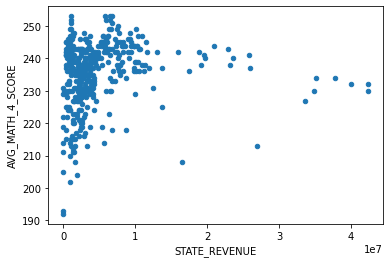

In [25]:
df.plot.scatter(x='STATE_REVENUE', y='AVG_MATH_4_SCORE')

**<Effect of State Revenue per Student on Average 4th Grade Math Score>**

**Visualization 2**

<AxesSubplot:xlabel='INSTRUCTION_EXPENDITURE_PER_STUDENT', ylabel='AVG_MATH_4_SCORE'>

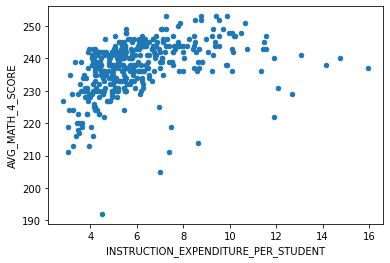

In [26]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT', y='AVG_MATH_4_SCORE')

**<Effect of Instruction Expenditure per Student on Average 4th Grade Math Score>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = df[['TOTAL_REVENUE','INSTRUCTION_EXPENDITURE_PER_STUDENT']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **<REGRESSION>**

In [30]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression



In [31]:
# create your model here
model = LinearRegression()

In [32]:
model.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [33]:
y_pred = model.predict(X_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [34]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

ValueError: plot_confusion_matrix only supports classifiers

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

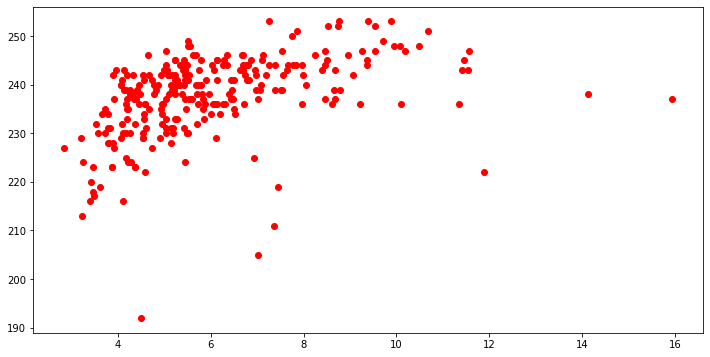

In [35]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = "INSTRUCTION_EXPENDITURE_PER_STUDENT"
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 4 score')

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK AND FINDINGS\>**

In [ ]:
print("In this project, I performed some preliminary data exploration and analysis in order to eventually come up with a predictive model to see the effects of Instruction Expenditure by state on a their students average grade 4 math scores. My visualized findings showed that there was a positive correlation between instructional expenditure per student and a grade 4 students math score.